# Centrality

In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'population']]
blocks_gdf.head()

,geometry,population
id,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",606
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",41
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",14
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",581
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",2004


In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf)

2025-03-04 18:51:55.476 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:8 - Generating nodes.
2025-03-04 18:51:55.485 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:13 - Generating edges.
2025-03-04 18:51:56.067 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:32 - Adjacency graph successfully generated: 16320 nodes, 15920 edges


## Population centrality

In [3]:
from blocksnet.analysis.centrality import population_centrality

centrality_df = population_centrality(blocks_gdf, adjacency_graph)
centrality_df.head()

,population,degree_centrality,population_normalized,degree_centrality_normalized,population_centrality
id,,,,,
0,606,0.000061,1.019320,1.034483,0.026685
1,41,0.000306,1.001307,1.172414,0.085219
2,14,0.000123,1.000446,1.068966,0.034021
3,581,0.000061,1.018523,1.034483,0.026281
4,2004,0.000613,1.063889,1.344828,0.211031


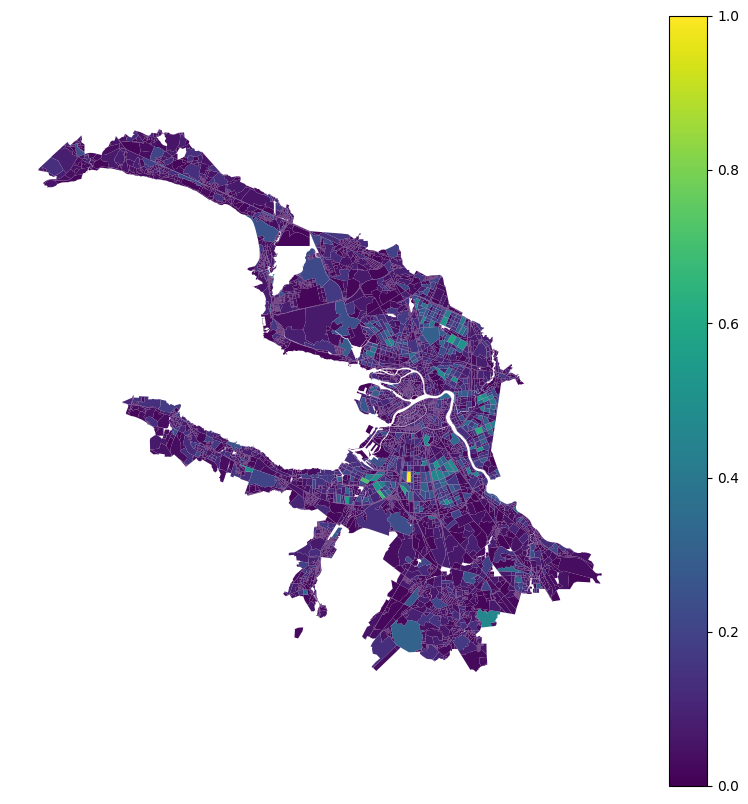

In [5]:
blocks_gdf[['geometry']].join(centrality_df).plot('population_centrality', legend=True, figsize=(10, 10)).set_axis_off()